<a href="https://colab.research.google.com/github/adex-badr18/HDSC-stage1-quiz-code/blob/master/Hamoye_stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import zipfile
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from numpy import isnan

In [15]:
# load all data
with zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/data/household_power_consumption.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [16]:
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

In [17]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [18]:
# mark all missing values indicated as '?' character by 'NaN'
from numpy import nan
dataset.replace('?', nan, inplace=True)

In [19]:
# make dataset numeric
dataset = dataset.astype('float32')

In [20]:
dataset.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [22]:
data_copy = dataset.copy()

In [21]:
dataset['Voltage'].mean()

243.38133239746094

In [31]:
# fill missing values
cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',	'Sub_metering_1',	'Sub_metering_2',	'Sub_metering_3']
for col in cols:
  data_copy[col].fillna(data_copy[col].mean())

In [32]:
data_copy.isna().sum()

Global_active_power      17629
Global_reactive_power    17629
Voltage                  17629
Global_intensity         17629
Sub_metering_1           17629
Sub_metering_2           17629
Sub_metering_3           17629
dtype: int64

In [11]:
# resample to daily data
daily_sample = dataset.resample('D').sum()

In [12]:
daily_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [13]:
daily_sample.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [30]:
# 12
from scipy.stats import pearsonr
gap = dataset['Global_active_power'].fillna(dataset['Global_active_power'].mean())
grp = dataset['Global_reactive_power'].fillna(dataset['Global_reactive_power'].mean())

corr, _ = pearsonr(gap, grp)
print('Pearson corr btw gap and grp is %.2f' % corr)

Pearson corr btw gap and grp is 0.25


Text(0, 0.5, 'Global_active_power')

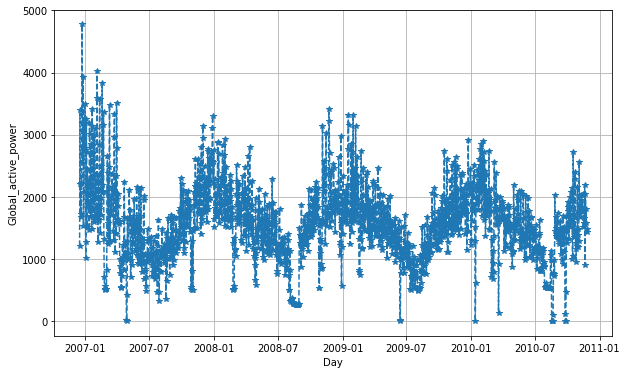

In [35]:
plt.figure(figsize=(10,6))
plt.plot(daily_sample.index, daily_sample.Global_active_power, '--', marker='*', )
plt.grid()
plt.xlabel('Day')
plt.ylabel('Global_active_power')

In [36]:
# 13
from scipy.stats import pearsonr
gap = dataset['Global_intensity'].fillna(dataset['Global_intensity'].mean())
grp = dataset['Voltage'].fillna(dataset['Voltage'].mean())

corr, _ = pearsonr(gap, grp)
print('Pearson corr btw gap and grp is %.2f' % corr)

Pearson corr btw gap and grp is -0.41


In [ ]:
from fbprophet import Prophet
lent = daily_sample.shape[0]
train = daily_sample[:lent]
test = daily_sample[365:]
model = Prophet()
model.fit(train)

#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M') 
forecast = model.predict(future) 
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries


model.plot(forecast)
plt.show()